<a href="https://colab.research.google.com/github/kairamilanifitria/NLP-Projects/blob/main/Project%202%20Text%20Summarization/Fix/2_EDA_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task2 : Text Summarization/fix_dataset/30k/train_df.csv')

In [5]:
train_df.shape

(29842, 7)

In [6]:
train_df.describe()

,Unnamed: 0,original_text_length,abstractive_summary_length,extractive_summary_length
count,29842.000000,29842.000000,29842.000000,29842.000000
mean,97776.605020,170.776389,26.310401,35.253569
std,55902.104797,62.742616,4.117733,8.755453
min,0.000000,32.000000,17.000000,11.000000
25%,49325.500000,123.000000,24.000000,29.000000
50%,97806.500000,159.000000,26.000000,35.000000
75%,146175.750000,209.000000,29.000000,41.000000
max,193876.000000,338.000000,36.000000,59.000000


In [7]:
train_df.head()

,Unnamed: 0,original_text,abstractive_summary,extractive_summary,original_text_length,abstractive_summary_length,extractive_summary_length
0,5000,liputan6 com liverpool sepertinya tidak ada au...,kembalinya wayne rooney ke goodison park disam...,manajer everton david moyes justru menyanjung ...,259,26,32
1,177781,liputan6 com jakarta karyawan pt angkasa pura ...,karyawan pt angkasa pura i berencana mogok ker...,liputan6 com jakarta karyawan pt angkasa pura ...,128,33,36
2,74555,liputan6 com jakarta peluh membasahi kening pu...,calon penumpang mesti bolak balik datang karen...,petugas pt kereta api indonesia memperkirakan ...,229,27,27
3,130129,liputan6 com ambon peningkatan status darurat ...,situasi keamanan di ambon maluku berangsur pul...,liputan6 com ambon peningkatan status darurat ...,204,19,24
4,181561,liputan6 com jakarta lima nelayan indonesia ya...,lima nelayan indonesia yang masuk perairan mal...,liputan6 com jakarta lima nelayan indonesia ya...,124,17,24


In [8]:
train_df = train_df.drop(['Unnamed: 0', 'original_text_length', 'abstractive_summary_length', 'extractive_summary_length'], axis=1)

In [11]:
train_df.head()

,original_text,abstractive_summary,extractive_summary
0,liputan6 com liverpool sepertinya tidak ada au...,kembalinya wayne rooney ke goodison park disam...,manajer everton david moyes justru menyanjung ...
1,liputan6 com jakarta karyawan pt angkasa pura ...,karyawan pt angkasa pura i berencana mogok ker...,liputan6 com jakarta karyawan pt angkasa pura ...
2,liputan6 com jakarta peluh membasahi kening pu...,calon penumpang mesti bolak balik datang karen...,petugas pt kereta api indonesia memperkirakan ...
3,liputan6 com ambon peningkatan status darurat ...,situasi keamanan di ambon maluku berangsur pul...,liputan6 com ambon peningkatan status darurat ...
4,liputan6 com jakarta lima nelayan indonesia ya...,lima nelayan indonesia yang masuk perairan mal...,liputan6 com jakarta lima nelayan indonesia ya...


# 1. Text Length Analysis

1.   **Objective**: Understand the length of articles and summaries to check for patterns.
2.   Calculate the number of words and sentences in the `clean_article` and `clean_summary`.
3. Visualize the distribution of text lengths using histograms or boxplots.
***analysis :***
1.   Are summaries much shorter than articles (as expected)?
2.   How do article lengths vary? Are there any extreme outliers?


In [13]:
# Function to calculate word and sentence count
def word_sentence_count(text):
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    return len(words), len(sentences)

# Apply the function to the text and summary columns
train_df['original_text_word_count'], train_df['original_text_sentence_count'] = zip(*train_df['original_text'].apply(word_sentence_count))
train_df['abstractive_summary_word_count'], train_df['abstractive_summary_sentence_count'] = zip(*train_df['abstractive_summary'].apply(word_sentence_count))
train_df['extractive_summary_word_count'], train_df['extractive_summary_sentence_count'] = zip(*train_df['extractive_summary'].apply(word_sentence_count))


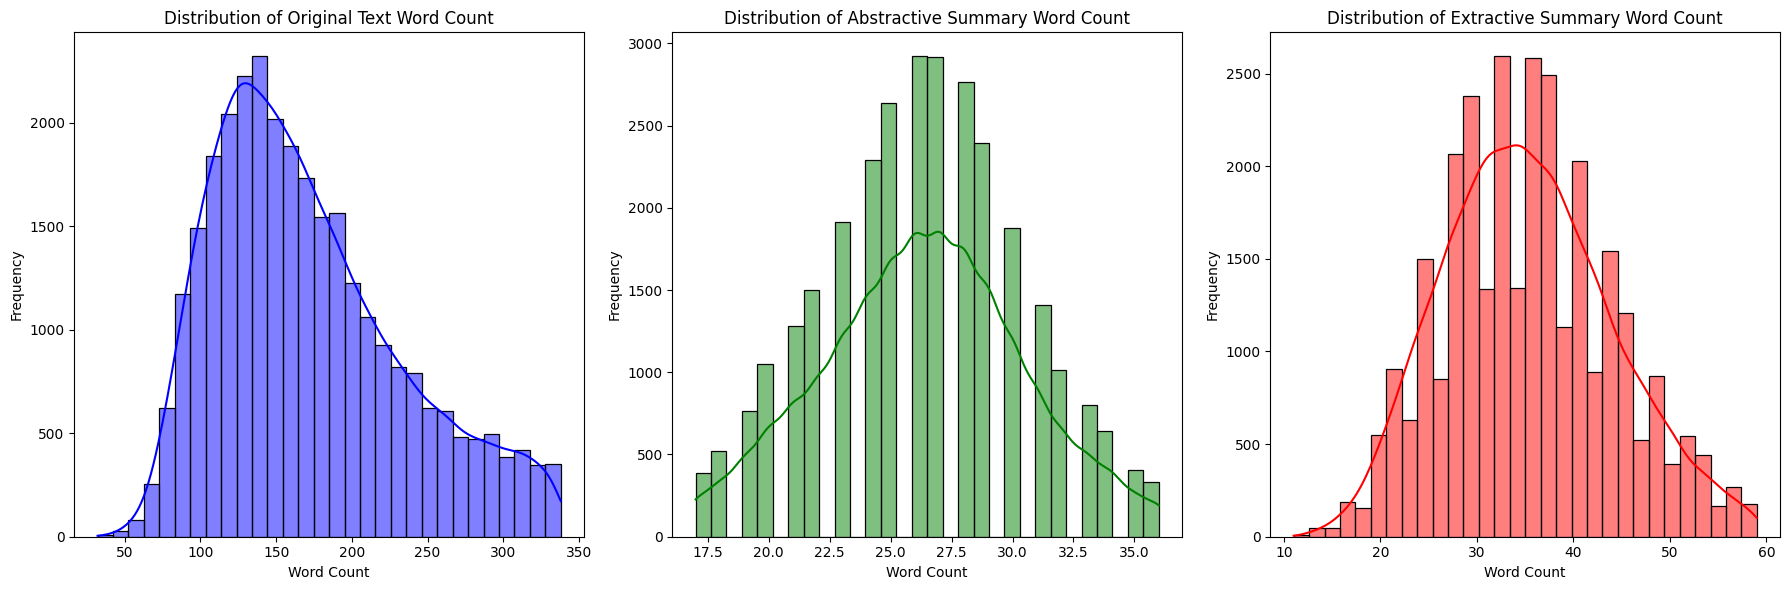

Text(0.5, 1.0, 'Boxplot of Extractive Summary Word Count')

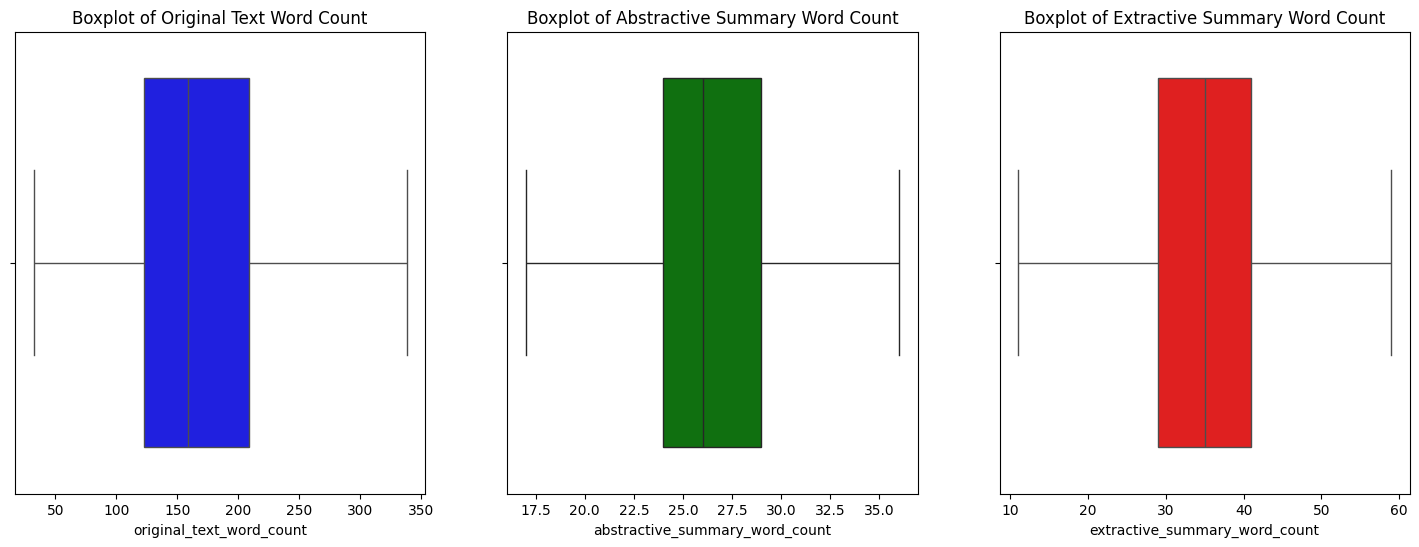

In [14]:
# Histograms for word counts
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(train_df['original_text_word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Original Text Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(train_df['abstractive_summary_word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(train_df['extractive_summary_word_count'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=train_df['original_text_word_count'], color='blue')
plt.title('Boxplot of Original Text Word Count')

plt.subplot(1, 3, 2)
sns.boxplot(x=train_df['abstractive_summary_word_count'], color='green')
plt.title('Boxplot of Abstractive Summary Word Count')

plt.subplot(1, 3, 3)
sns.boxplot(x=train_df['extractive_summary_word_count'], color='red')
plt.title('Boxplot of Extractive Summary Word Count')

In [16]:
# Summary statistics
print("Average article word count:", train_df['original_text_word_count'].mean())
print("Average abstractive summary word count:", train_df['abstractive_summary_word_count'].mean())
print("Average extractive summary word count:", train_df['extractive_summary_word_count'].mean())

# Find outliers in article word count (using IQR method)
Q1 = train_df['original_text_word_count'].quantile(0.25)
Q3 = train_df['original_text_word_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['original_text_word_count'] < (Q1 - 1.5 * IQR)) | (train_df['original_text_word_count'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in original text word count:", outliers.shape[0])

Average article word count: 170.77662355070035
Average abstractive summary word count: 26.31043495744253
Average extractive summary word count: 35.2536023054755
Number of outliers in original text word count: 0


# 2. Summary Analysis

1.   **Objective**: Understand how much of the article is covered in the extractive summary
2.   **Key actions**: For each article, calculate the percentage of sentences that are included in the `extractive_summary`.
3. Visualize the distribution of these percentages.

**Summary** coverage: How much of the original text is covered by the abstractive summary? This can be approximated by checking the percentage of words in the summary that overlap with the original text.


**Extractive summary** coverage: How much of the original text is covered by the extractive summary? Since the extractive summary is generated by directly taking parts of the original text, we can check how many of its words match the original text.

Coverage Calculation:

For each row, we calculate the ratio of words in the summary (abstractive) and e_summary (extractive) that overlap with the text (original article).
This ratio gives a measure of how much the summary captures from the original article.
Visualizing Coverage:

The histograms show the distribution of coverage ratios, helping to compare how much coverage each type of summary provides.
The boxplots help identify potential outliers where summaries have very low or high coverage relative to the original article.
Summary Statistics:

You can use the average coverage to see if the extractive summary covers more or less of the original article compared to the abstractive summary.

In [17]:
# Function to calculate word overlap coverage between summary and article
def coverage_ratio(summary, article):
    # Tokenize and convert to sets for comparison
    article_words = set(word_tokenize(article.lower()))
    summary_words = set(word_tokenize(summary.lower()))

    # Calculate the ratio of overlapping words
    if len(summary_words) == 0:
        return 0
    overlap = summary_words.intersection(article_words)
    return len(overlap) / len(summary_words)

# Calculate coverage for both summaries
train_df['abstractive_summary_coverage'] = train_df.apply(lambda row: coverage_ratio(row['abstractive_summary'], row['original_text']), axis=1)
train_df['extractive_summary_coverage'] = train_df.apply(lambda row: coverage_ratio(row['extractive_summary'], row['original_text']), axis=1)


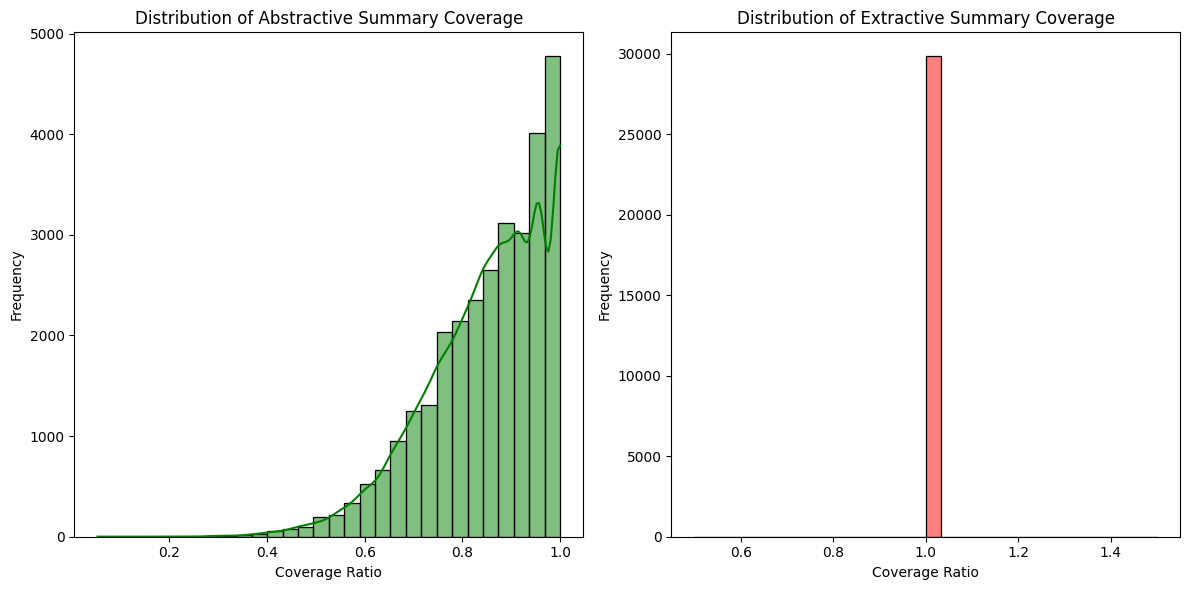

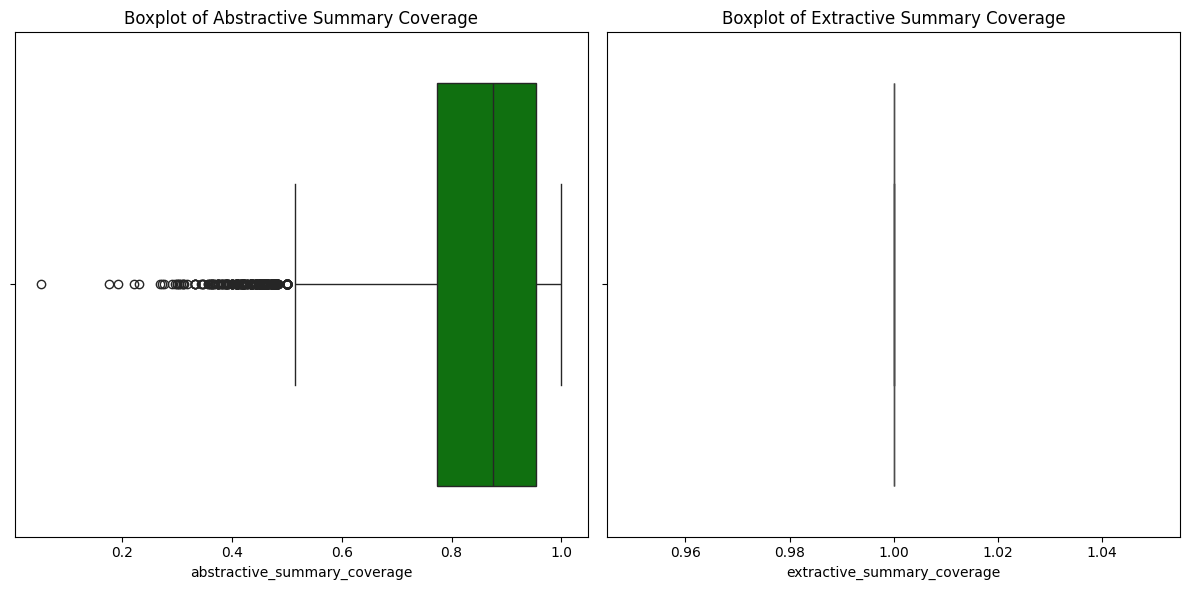

In [18]:
# Histograms for coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['abstractive_summary_coverage'], bins=30, kde=True, color='green')
plt.title('Distribution of Abstractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(train_df['extractive_summary_coverage'], bins=30, kde=True, color='red')
plt.title('Distribution of Extractive Summary Coverage')
plt.xlabel('Coverage Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for outlier detection in coverage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['abstractive_summary_coverage'], color='green')
plt.title('Boxplot of Abstractive Summary Coverage')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['extractive_summary_coverage'], color='red')
plt.title('Boxplot of Extractive Summary Coverage')

plt.tight_layout()
plt.show()

In [19]:
# Summary statistics for coverage
print("Average coverage for abstractive summary:", train_df['abstractive_summary_coverage'].mean())
print("Average coverage for extractive summary:", train_df['extractive_summary_coverage'].mean())

# Find outliers in abstractive summary coverage
Q1_summary = train_df['abstractive_summary_coverage'].quantile(0.25)
Q3_summary = train_df['abstractive_summary_coverage'].quantile(0.75)
IQR_summary = Q3_summary - Q1_summary
a_summary_outliers = train_df[(train_df['abstractive_summary_coverage'] < (Q1_summary - 1.5 * IQR_summary)) |
                            (train_df['abstractive_summary_coverage'] > (Q3_summary + 1.5 * IQR_summary))]
print("Number of outliers in abstractive summary coverage:", a_summary_outliers.shape[0])

# Find outliers in extractive summary coverage
Q1_e_summary = train_df['extractive_summary_coverage'].quantile(0.25)
Q3_e_summary = train_df['extractive_summary_coverage'].quantile(0.75)
IQR_e_summary = Q3_e_summary - Q1_e_summary
e_summary_outliers = train_df[(train_df['extractive_summary_coverage'] < (Q1_e_summary - 1.5 * IQR_e_summary)) |
                              (train_df['extractive_summary_coverage'] > (Q3_e_summary + 1.5 * IQR_e_summary))]
print("Number of outliers in extractive summary coverage:", e_summary_outliers.shape[0])


Average coverage for abstractive summary: 0.8507300520522096
Average coverage for extractive summary: 1.0
Number of outliers in abstractive summary coverage: 384
Number of outliers in extractive summary coverage: 0


# 3. N-gram and Word Frequency Analysis

1.   **Objective**: Identify the most common words and phrases used in both the articles and the summaries.
2.   **Key actions**:Perform word frequency analysis and plot the most common unigrams, bigrams, or trigrams in `clean_article` and `clean_summary`.

Insights:
*   Are the same key terms or phrases frequently appearing in both articles and summaries?
*   Are there any domain-specific terms or phrases?

In [20]:
# Install necessary library
!pip install scikit-learn

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
# Function to extract N-grams
def get_ngrams(text, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_vector = vectorizer.fit_transform(text)
    sum_words = ngram_vector.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Get unigrams, bigrams, and trigrams for articles, abstractive summaries, and extractive summaries
article_unigrams = get_ngrams(train_df['original_text'], n=1)
article_bigrams = get_ngrams(train_df['original_text'], n=2)
article_trigrams = get_ngrams(train_df['original_text'], n=3)

a_summary_unigrams = get_ngrams(train_df['abstractive_summary'], n=1)
a_summary_bigrams = get_ngrams(train_df['abstractive_summary'], n=2)
a_summary_trigrams = get_ngrams(train_df['abstractive_summary'], n=3)

e_summary_unigrams = get_ngrams(train_df['extractive_summary'], n=1)
e_summary_bigrams = get_ngrams(train_df['extractive_summary'], n=2)
e_summary_trigrams = get_ngrams(train_df['extractive_summary'], n=3)

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


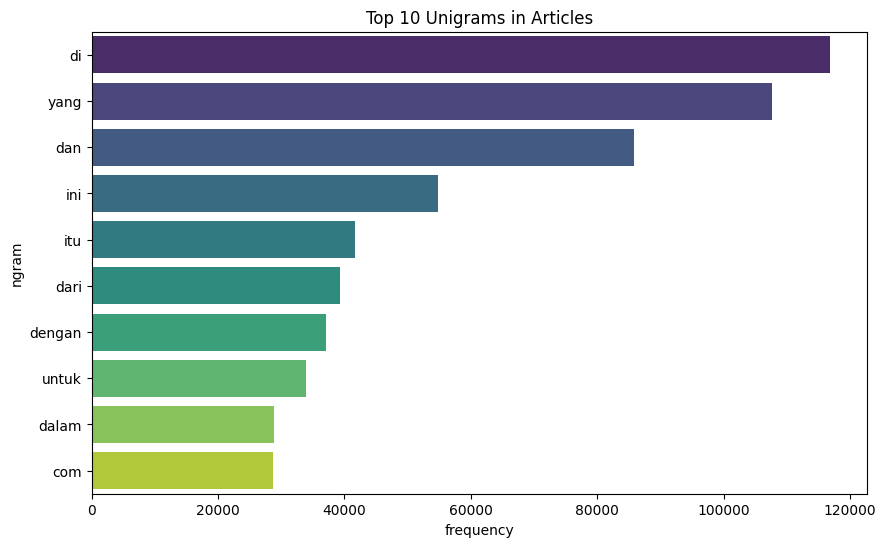

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


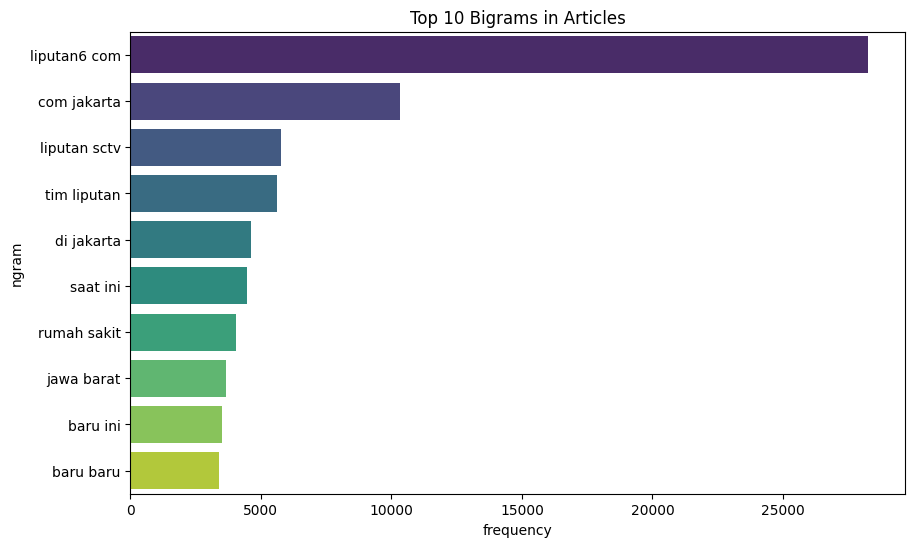

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


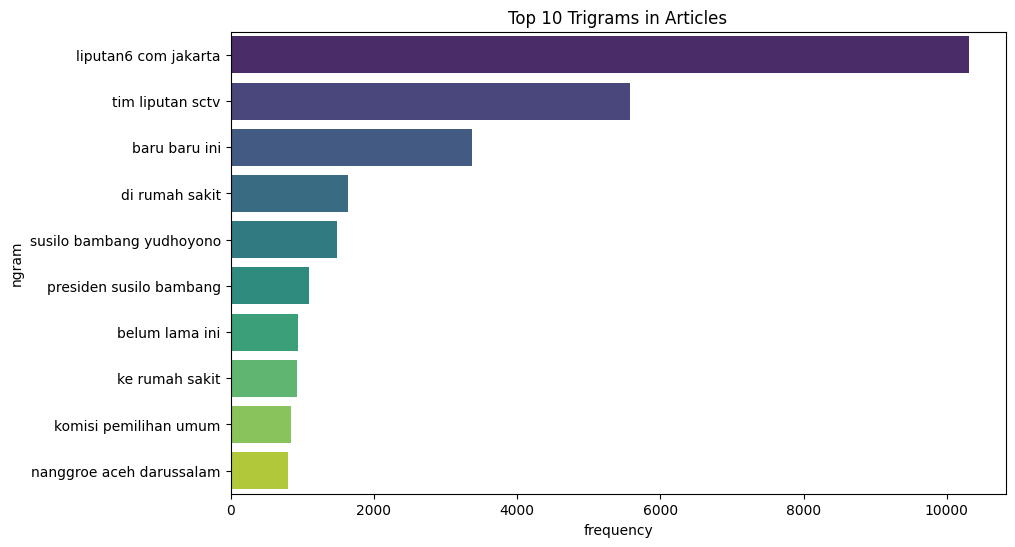

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


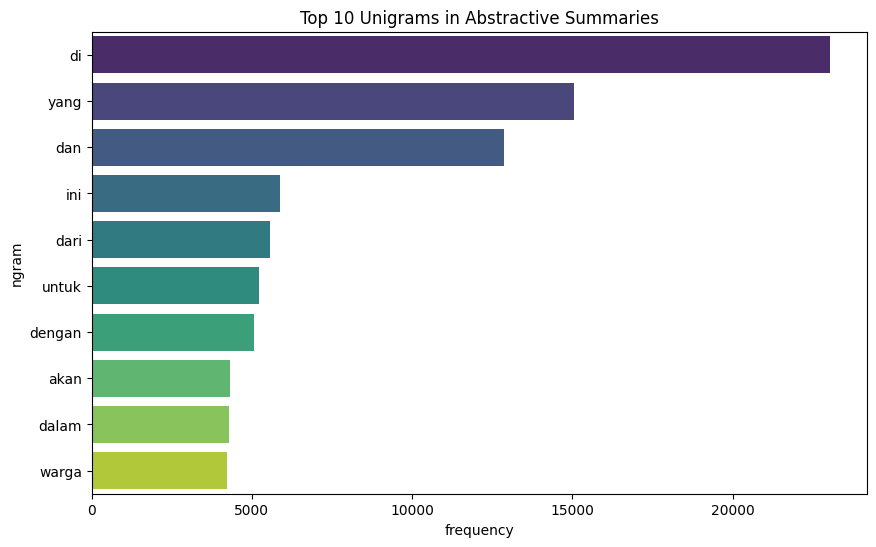

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


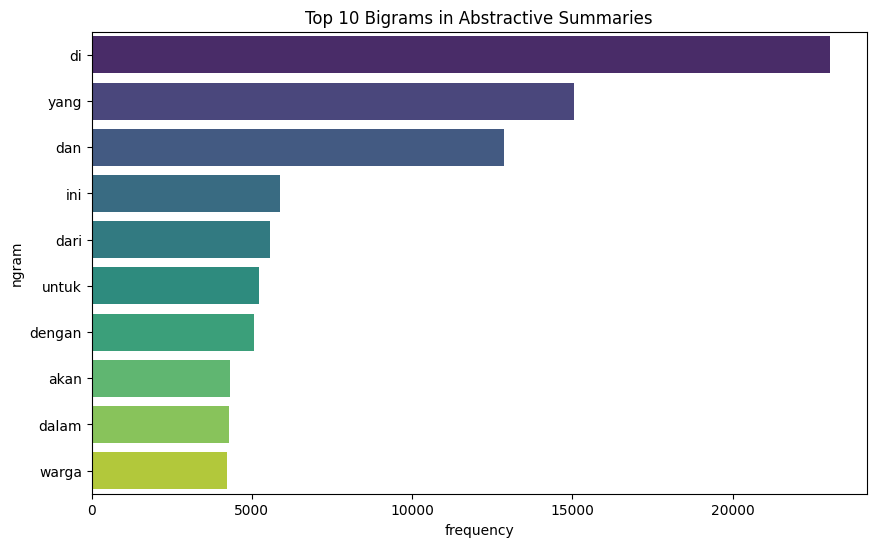

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


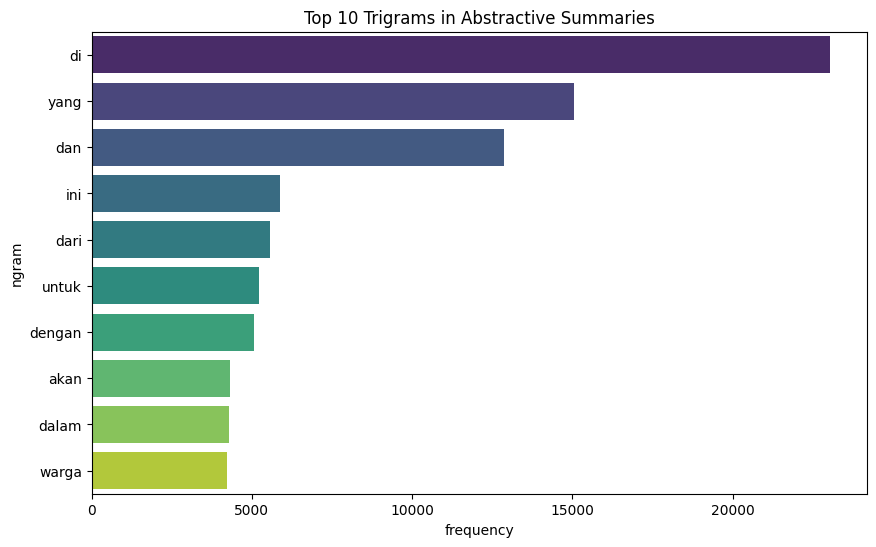

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


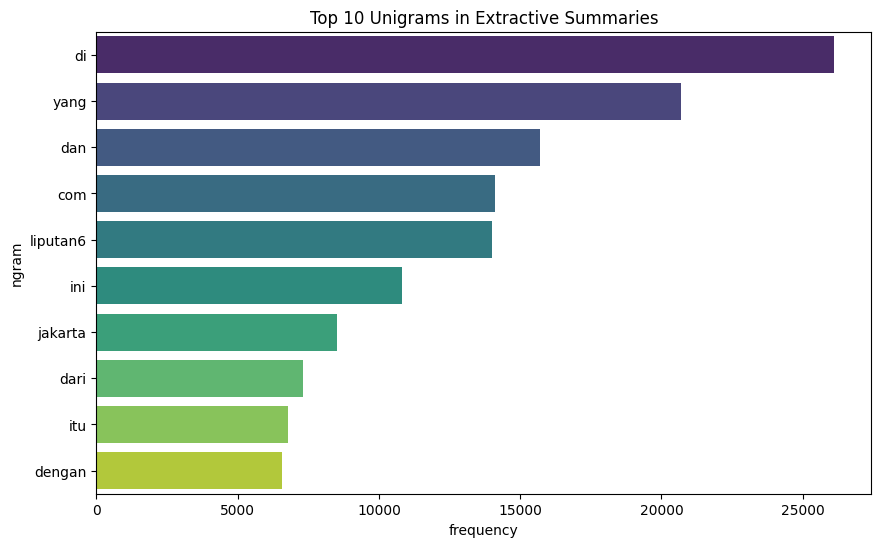

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


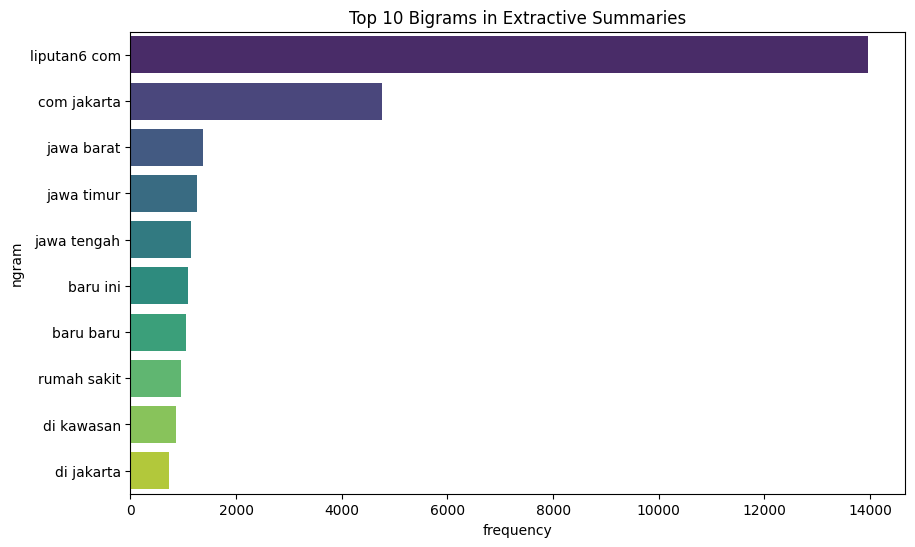

<ipython-input-22-63c59d80e0de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')


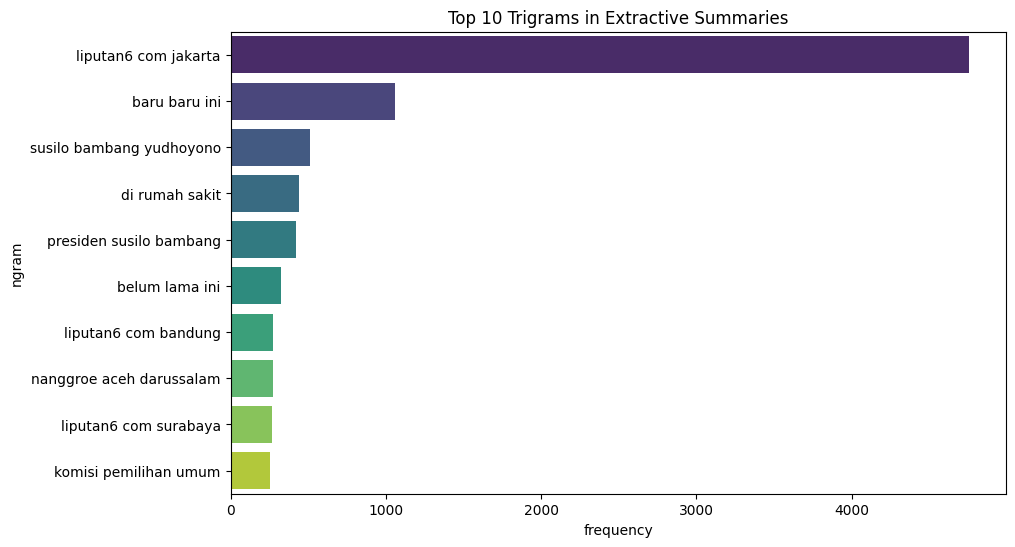

In [22]:
# Function to visualize top N N-grams
def plot_ngrams(ngrams, title, top_n=10):
    ngrams_df = pd.DataFrame(ngrams, columns=['ngram', 'frequency']).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='frequency', y='ngram', data=ngrams_df, palette='viridis')
    plt.title(title)
    plt.show()

# Visualize top N N-grams for articles, summaries, and extractive summaries
plot_ngrams(article_unigrams, 'Top 10 Unigrams in Articles')
plot_ngrams(article_bigrams, 'Top 10 Bigrams in Articles')
plot_ngrams(article_trigrams, 'Top 10 Trigrams in Articles')

plot_ngrams(a_summary_unigrams, 'Top 10 Unigrams in Abstractive Summaries')
plot_ngrams(a_summary_unigrams, 'Top 10 Bigrams in Abstractive Summaries')
plot_ngrams(a_summary_unigrams, 'Top 10 Trigrams in Abstractive Summaries')

plot_ngrams(e_summary_unigrams, 'Top 10 Unigrams in Extractive Summaries')
plot_ngrams(e_summary_bigrams, 'Top 10 Bigrams in Extractive Summaries')
plot_ngrams(e_summary_trigrams, 'Top 10 Trigrams in Extractive Summaries')


# 4. Comparing Extractive and Abstractive Summaries

1.   **Objective**: Evaluate the differences between extractive and abstractive summaries.
2.   **Key actions**: Check how similar the `abstractive_summary`  and `extractive_summary` are by comparing the number of overlapping sentences.
3. Compute an overlap score by checking how many sentences or words in the extractive summary are also present in the abstractive summary.

Insights:
*   Are the abstractive summaries significantly different from the extractive ones?
*   Does the overlap between the two indicate how the abstractive summary might have been generated?

In [23]:
# Function to calculate word overlap
def calculate_word_overlap(abstractive, extractive):
    abstract_words = set(abstractive.split())
    extractive_words = set(extractive.split())
    overlap = abstract_words.intersection(extractive_words)
    return len(overlap), len(abstract_words), len(extractive_words)

# Function to calculate sentence overlap
def calculate_sentence_overlap(abstractive, extractive):
    abstract_sentences = set(abstractive.split('. '))
    extractive_sentences = set(extractive.split('. '))
    overlap = abstract_sentences.intersection(extractive_sentences)
    return len(overlap), len(abstract_sentences), len(extractive_sentences)

# Create a new DataFrame to store overlap results
overlap_results = []

for index, row in train_df.iterrows():
    word_overlap_count, total_abstractive_words, total_extractive_words = calculate_word_overlap(row['abstractive_summary'], row['extractive_summary'])
    sentence_overlap_count, total_abstractive_sentences, total_extractive_sentences = calculate_sentence_overlap(row['abstractive_summary'], row['extractive_summary'])

    overlap_results.append({
        'word_overlap_count': word_overlap_count,
        'total_abstractive_words': total_abstractive_words,
        'total_extractive_words': total_extractive_words,
        'sentence_overlap_count': sentence_overlap_count,
        'total_abstractive_sentences': total_abstractive_sentences,
        'total_extractive_sentences': total_extractive_sentences
    })

overlap_df = pd.DataFrame(overlap_results)


In [24]:
# Calculate overlap ratios
overlap_df['word_overlap_ratio'] = overlap_df['word_overlap_count'] / overlap_df['total_abstractive_words']
overlap_df['sentence_overlap_ratio'] = overlap_df['sentence_overlap_count'] / overlap_df['total_abstractive_sentences']

Word Overlap Ratio Statistics:
count    29842.000000
mean         0.709144
std          0.185073
min          0.052632
25%          0.571429
50%          0.703704
75%          0.863636
max          1.000000
Name: word_overlap_ratio, dtype: float64
Sentence Overlap Ratio Statistics:
count    29842.000000
mean         0.008545
std          0.092045
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentence_overlap_ratio, dtype: float64


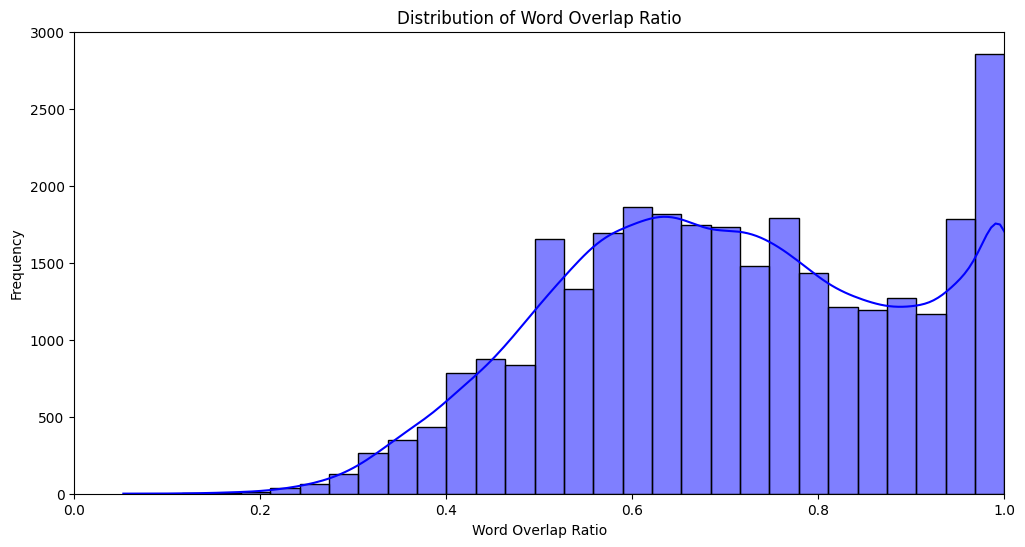

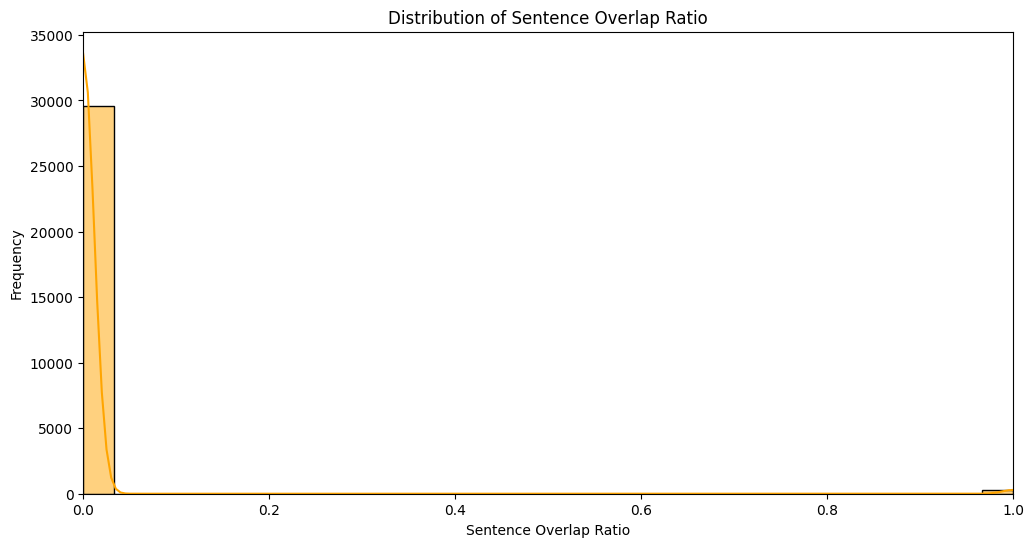

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check for zero values and outliers in overlap ratios
print("Word Overlap Ratio Statistics:")
print(overlap_df['word_overlap_ratio'].describe())

print("Sentence Overlap Ratio Statistics:")
print(overlap_df['sentence_overlap_ratio'].describe())

# Filter out ratios greater than 1 if any
filtered_overlap_df = overlap_df[
    (overlap_df['word_overlap_ratio'] >= 0) &
    (overlap_df['word_overlap_ratio'] <= 1) &
    (overlap_df['sentence_overlap_ratio'] >= 0) &
    (overlap_df['sentence_overlap_ratio'] <= 1)
]

# Visualize Word Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_df['word_overlap_ratio'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Overlap Ratio')
plt.xlabel('Word Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()

# Visualize Sentence Overlap Ratio
plt.figure(figsize=(12, 6))
sns.histplot(filtered_overlap_df['sentence_overlap_ratio'], bins=30, kde=True, color='orange')
plt.title('Distribution of Sentence Overlap Ratio')
plt.xlabel('Sentence Overlap Ratio')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis
plt.show()


# 5. Distribution of Extractive vs Abstractive Summaries

**Length Ratio**: The y-axis shows the ratio of the summary lengths to the original article lengths. A ratio of 1.0 means the summary length is equal to the original length, while a ratio less than 1.0 indicates that the summary is shorter.

**Boxplot Analysis**:
The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box indicates the median length ratio.
The whiskers extend to the lowest and highest values within 1.5 times the IQR from the lower and upper quartiles, respectively. Points beyond the whiskers are considered outliers.
The red dashed line at y=1 indicates where the length of the summaries would match the original text length.
Comparison:

If the summary_ratio (abstractive) box is significantly lower than the e_summary_ratio (extractive) box, this indicates that, on average, the abstractive summaries are shorter than the extractive ones compared to the original text.
If both ratios are low and below 1.0, it suggests that both types of summaries are shorter than the original text.

<ipython-input-29-c558b116b3fa>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Summary Type', y='Length Ratio', data=length_ratio_data_melted, palette='pastel')


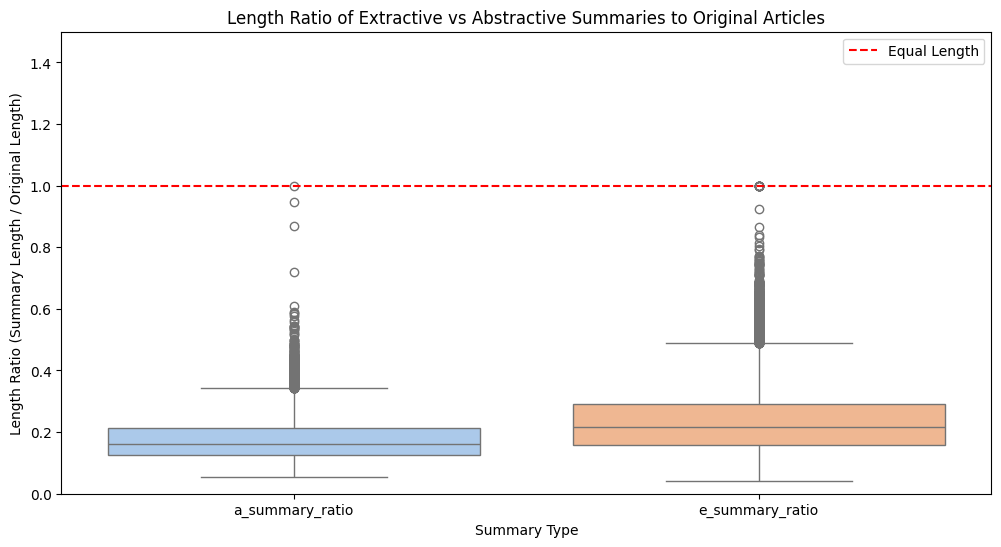

                                       original_text  \
0  liputan6 com liverpool sepertinya tidak ada au...   
1  liputan6 com jakarta karyawan pt angkasa pura ...   
2  liputan6 com jakarta peluh membasahi kening pu...   
3  liputan6 com ambon peningkatan status darurat ...   
4  liputan6 com jakarta lima nelayan indonesia ya...   

                                 abstractive_summary  \
0  kembalinya wayne rooney ke goodison park disam...   
1  karyawan pt angkasa pura i berencana mogok ker...   
2  calon penumpang mesti bolak balik datang karen...   
3  situasi keamanan di ambon maluku berangsur pul...   
4  lima nelayan indonesia yang masuk perairan mal...   

                                  extractive_summary  original_length  \
0  manajer everton david moyes justru menyanjung ...              259   
1  liputan6 com jakarta karyawan pt angkasa pura ...              128   
2  petugas pt kereta api indonesia memperkirakan ...              229   
3  liputan6 com ambon peningkatan 

In [29]:
# Function to calculate the length of text in words
def calculate_length(text):
    return len(text.split())

# Calculate lengths for the original text, extractive summary, and abstractive summary
train_df['original_length'] = train_df['original_text'].apply(calculate_length)
train_df['e_summary_length'] = train_df['extractive_summary'].apply(calculate_length)
train_df['a_summary_length'] = train_df['abstractive_summary'].apply(calculate_length)

# Calculate length ratios
train_df['a_summary_ratio'] = train_df['a_summary_length'] / train_df['original_length']
train_df['e_summary_ratio'] = train_df['e_summary_length'] / train_df['original_length']

# Prepare data for visualization
length_ratio_data = train_df[['a_summary_ratio', 'e_summary_ratio']]

# Melt the DataFrame for easier plotting
length_ratio_data_melted = length_ratio_data.melt(var_name='Summary Type', value_name='Length Ratio')

# Visualize the ratios using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Summary Type', y='Length Ratio', data=length_ratio_data_melted, palette='pastel')
plt.title('Length Ratio of Extractive vs Abstractive Summaries to Original Articles')
plt.ylabel('Length Ratio (Summary Length / Original Length)')
plt.xlabel('Summary Type')
plt.ylim(0, 1.5)  # Adjust y-axis for better visualization
plt.axhline(y=1, color='red', linestyle='--', label='Equal Length')
plt.legend()
plt.show()

# Display the first few rows of the updated DataFrame
print(train_df[['original_text', 'abstractive_summary', 'extractive_summary', 'original_length', 'a_summary_length', 'e_summary_length', 'a_summary_ratio', 'e_summary_ratio']].head())


# 6. Summarization Compression Ratio

compute the ratio of article length to summary length for both extractive and abstractive summaries.

The boxplot showing the compression ratios of extractive (e_summary_compression_ratio) and abstractive (summary_compression_ratio) summaries compared to the original text provides a visual interpretation of how much shorter each type of summary is relative to the original content. Here’s how to interpret the results:

Interpretation of the Boxplot
Boxplot Structure:

Box: The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box indicates the median compression ratio.
Whiskers: The lines extending from the box (whiskers) show the range of the data, excluding outliers. They extend to the most extreme data points within 1.5 times the IQR from the first and third quartiles.
Outliers: Points beyond the whiskers are considered outliers, indicating that these compression ratios are significantly different from the majority of the data.
Comparison Between Summary Types:

Compression Ratio:
Both types of summaries have high median compression ratios, indicating that both summary types are significantly shorter than the original text (since the ratios are close to 1).
The abstractive summary (summary) has a slightly higher median compression ratio than the extractive summary (e_summary). This suggests that, on average, the abstractive summaries are shorter compared to the original text than the extractive summaries.
Spread and Variation:

Variation: The extractive summaries show a wider spread in their compression ratios, indicated by the longer whiskers and the presence of outliers. This could imply that while many extractive summaries are shorter, some are not as concise, resulting in greater variability.
Outliers: The presence of outliers in both summary types suggests that there are some summaries that significantly deviate from the typical lengths. It might be useful to investigate these outliers to understand why certain summaries are particularly long or short.
Compression Insights:

Abstractive Summaries: The higher median suggests they tend to provide more concise versions of the original text while maintaining essential information.
Extractive Summaries: The variability suggests that their lengths can vary greatly, possibly depending on how many sentences or phrases are extracted from the original text.
Conclusion
Overall, this visualization allows you to quickly assess how effective each summarization method is in compressing the original text. It appears that abstractive summarization is generally more effective in achieving higher compression ratios than extractive summarization. However, the extractive approach exhibits a greater range of lengths, which could be beneficial in some contexts.

In [30]:
# Calculate lengths
train_df['text_length'] = train_df['original_text'].str.split().str.len()  # Length of original text
train_df['a_summary_length'] = train_df['abstractive_summary'].str.split().str.len()  # Length of abstractive summary
train_df['e_summary_length'] = train_df['extractive_summary'].str.split().str.len()  # Length of extractive summary

# Calculate compression ratios
train_df['a_summary_compression_ratio'] = (train_df['text_length'] - train_df['a_summary_length']) / train_df['text_length']
train_df['e_summary_compression_ratio'] = (train_df['text_length'] - train_df['e_summary_length']) / train_df['text_length']

# Display the first few rows of the DataFrame with compression ratios
print(train_df[['text_length', 'a_summary_length', 'e_summary_length', 'a_summary_compression_ratio', 'e_summary_compression_ratio']].head())


   text_length  a_summary_length  e_summary_length  \
0          259                26                32   
1          128                33                36   
2          229                27                27   
3          204                19                24   
4          124                17                24   

   a_summary_compression_ratio  e_summary_compression_ratio  
0                     0.899614                     0.876448  
1                     0.742188                     0.718750  
2                     0.882096                     0.882096  
3                     0.906863                     0.882353  
4                     0.862903                     0.806452  


<ipython-input-31-c38ae4c029ee>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Summary Type', y='Compression Ratio', data=compression_data, palette='Set2')


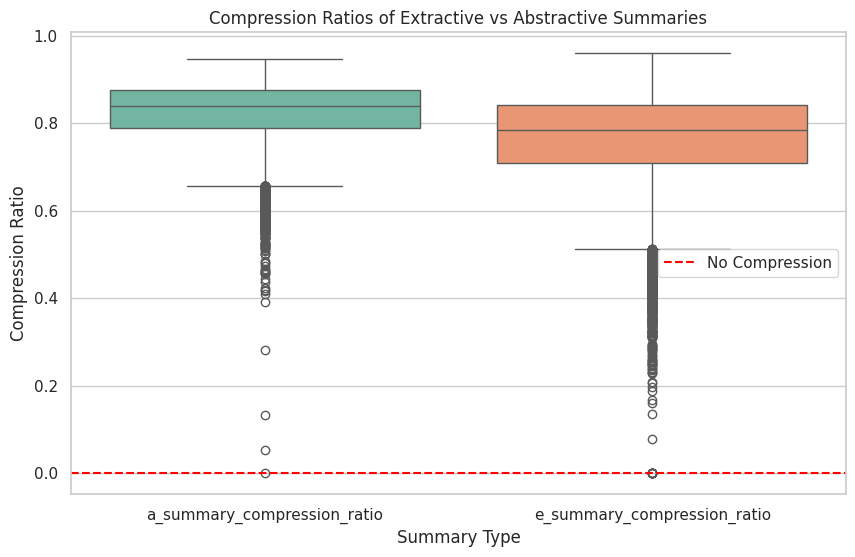

In [31]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a DataFrame for plotting
compression_data = train_df[['a_summary_compression_ratio', 'e_summary_compression_ratio']].melt(var_name='Summary Type', value_name='Compression Ratio')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Summary Type', y='Compression Ratio', data=compression_data, palette='Set2')
plt.title('Compression Ratios of Extractive vs Abstractive Summaries')
plt.xlabel('Summary Type')
plt.ylabel('Compression Ratio')
plt.axhline(0, color='red', linestyle='--', label='No Compression')
plt.legend()
plt.show()
